In [2]:
# %matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re, seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import re, seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, accuracy_score
import random
# from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
input_data = pd.read_csv("./analysis_lab_data/guided_backprop_30_eigenbasis_2_centering_0.9_lab_data.csv")

In [ ]:
# Selecting the top 15 features
top_15_features = input_data.nlargest(10, columns='0')

# Set the font scale and style
sns.set(font_scale=1.4, style="whitegrid")

# More modern color palette
# modern_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
modern_colors = ['#619b8a', '#fe7f2d', '#fcca46', '#a1c181', '#8789C0']

# Defining the groups and their corresponding colors
groups = {
    "thickavg_prime": ("Thickness", 'blue'),
    "meancurv": ("Mean Curvature", 'green'),
    "surfarea_prime": ("Surface Area", 'orange'),
    "volume_mm3_prime": ("Volume (mm3)", 'red'),
    "gauscurv": ("Gaussian Curvature", 'purple')
}

# Function to shorten the feature name by keeping only the text up to the "_" before the group name
def shorten_feature_name(feature_name):
    for key in groups.keys():
        if key in feature_name:
            return feature_name.split('_' + key)[0]
    return feature_name

# Applying the function to shorten the feature names
top_15_features['Shortened_Name'] = top_15_features['index'].apply(shorten_feature_name)

# Function to capitalize the first letter and replace remaining "_" with spaces
def format_feature_name(feature_name):
    return feature_name.replace('_', ' ').title()

# Applying the function to format the feature names
top_15_features['Formatted_Name'] = top_15_features['Shortened_Name'].apply(format_feature_name)

# Mapping the groups to the modern color palette
color_mapping = {key: modern_colors[i % len(modern_colors)] for i, key in enumerate(groups.keys())}

# Function to assign group name and modern color
def assign_group_and_modern_color(feature_name):
    for key, value in groups.items():
        if key in feature_name:
            return value[0], color_mapping[key]
    return ("Other", 'gray')

# Applying the function to the dataframe
top_15_features['Group'], top_15_features['Modern_Color'] = zip(*top_15_features['index'].apply(assign_group_and_modern_color))


# Plotting the updated barplot with modern colors and legend outside
plt.figure(figsize=(14, 10), dpi=300)
bars = plt.bar(top_15_features['index'], top_15_features['0'], color=top_15_features['Modern_Color'])

# Updating the x-axis ticks with the formatted names
plt.xticks(ticks=range(len(top_15_features['Formatted_Name'])), labels=top_15_features['Formatted_Name'], rotation=45, ha="right", fontsize=16)
plt.ylabel('Feature Importance', fontsize=20)
plt.title('Feature Importance - Guided Backpropagation', fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=20)
plt.yticks(fontsize=20)

# Adding the legend outside the plot to the right
handles = [plt.Rectangle((0,0),1,1, color=color_mapping[key]) for key in groups.keys()]
labels = [group[0] for group in groups.values()]
legend = plt.legend(handles, labels, title="Measurement Type", loc="center left", bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_texts(), fontsize=20)
plt.setp(legend.get_title(), fontsize=20)


plt.tight_layout()

# Saving the updated plot
modern_plot_path = './plots_lab_data/guided_backprop_lab_data_top_10_features.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()



In [ ]:


sns.set_style("whitegrid")
sns.set()

# Setting the seed
run_with_seed = 1964
np.random.seed(run_with_seed)
random.seed(run_with_seed)
np.random.seed(run_with_seed)

input_data = pd.read_csv("./analysis_lab_data/weight_val_knn_30_eigenbasis_2_centering_0.9_lad_data.csv")

print(input_data.columns)

# input_data_feats = pd.read_csv("./source_data/lab_data/combined_training_data_with_trauma_vars_longitudinal_07_26.csv")
input_data_feats = pd.read_csv("./lab_data_trauma_aud/graph_factors_raw_lab_data.csv")
input_data_feats = input_data_feats.drop_duplicates(subset='subject', keep='last')

input_data_preds = pd.read_csv("./analysis_lab_data/weights_pred_knn_30_eigenbasis_2_centering_0.9_lab_data.csv")
input_data_preds = input_data_preds[['subject', 'Labels', 'Prediction']]

bin_labels_5 = [0, 1, 2, 3, 4]

input_data['binned'] = pd.qcut(input_data['weight_val'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels_5)

merged = pd.merge(input_data, input_data_feats, on='subject')

merged_with_preds = pd.merge(merged, input_data_preds, on='subject')

# Assuming 'df' is your DataFrame and 'ID', 'feature1', 'feature2', 'feature3' are your columns.
# We first separate the ID column and the feature columns.
df = merged_with_preds.copy()

df_features = merged_with_preds[['demo_sex', 'age', 'demo_ses']]

print(df_features.head(5))

# Merge the two dataframes on the subject ID
# merged_data = pd.merge(df, input_data_raw, left_on='subject', right_on='subject')

df_id = df['subject']

# Standardize the feature matrix
x = StandardScaler().fit_transform(df_features)

# Create a KMeans instance with 3 clusters: change this if you want more or fewer clusters.
kmeans = KMeans(n_clusters=5)

# Fit the model
kmeans.fit(x)

# Get the cluster assignments
labels = kmeans.labels_

# Create a DataFrame aligning labels and features
df_clustered = pd.DataFrame(x, columns=['demo_sex_x', 'demo_ses', 'age'])
df_clustered['Cluster'] = labels

# Get the cluster assignments
labels = kmeans.labels_

# Include the subject ID to df_clustered
df_clustered['subject'] = df_id.values

# Save to csv
df_clustered.to_csv('clustered_lab_data_10_08.csv', index=False)

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(df_clustered['demo_sex_x'], df_clustered['demo_ses'], c=labels, cmap='viridis')

plt.show()

# tipi_etv
fig, ax = plt.subplots(figsize=(15,8))

sc = ax.scatter(df_clustered['demo_sex_x'], df_clustered['demo_ses'], 
                s=50, c=labels, marker='o', cmap="viridis", alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)


ax.set_ylabel('Socioeconomic Status', fontsize=25, labelpad=10)
ax.set_xlabel('Sex', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-Means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# legend
plt.show()

# cluster based on family alc history
fig, ax = plt.subplots(figsize=(15,8))

sc = ax.scatter(df_clustered['age'], df_clustered['demo_ses'], 
                s=50, c=labels, marker='o', cmap="viridis", alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)


ax.set_ylabel('Age', fontsize=25, labelpad=10)
ax.set_xlabel('Socioeconomic Status', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-Means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# legend
plt.show()


# cluster based on family alc history
fig, ax = plt.subplots(figsize=(15,8))

sc = ax.scatter(df_clustered['age'], df_clustered['demo_sex_x'], 
                s=50, c=labels, marker='o', cmap="viridis", alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)


ax.set_ylabel('Age', fontsize=25, labelpad=10)
ax.set_xlabel('Sex', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-Means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# legend
plt.show()


# axes instance
plt.clf()
sns.set_style("whitegrid")
# sns.set()
fig = plt.figure(figsize=(15,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# yellow --> #fde725
# light green --> #5ec962
# teal --> #21918c
# blue --> #3b528b
# dark blue --> #440154

colors=['#440154','#3b528b','#5ec962','#21918c','#fde725']

cmap = mcolors.ListedColormap(colors)

sc = ax.scatter(df_clustered['demo_sex_x'], df_clustered['demo_ses'], df_clustered['age'], s=50, c=labels, marker='o', cmap=cmap, alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)


ax.set_xlabel('Sex', fontsize=25, labelpad=10)
ax.set_ylabel('Socioeconomic Status', fontsize=25, labelpad=10)
ax.set_zlabel('Age', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-Means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# legend
plt.show()


In [ ]:
input_data_preds = pd.read_csv("./clustered_lab_data_10_08.csv")
input_data_raw = pd.read_csv("./lab_data_trauma_aud/graph_factors_raw_lab_data.csv")

# Merge the two dataframes on the subject ID
merged_data = pd.merge(input_data_preds, input_data_raw, left_on='subject', right_on='subject')

input_data_preds = pd.read_csv("./analysis_lab_data/weights_pred_knn_30_eigenbasis_2_centering_0.9_lab_data.csv")
input_data_preds = input_data_preds[['subject', 'Labels', 'Prediction']]

merged_data = pd.merge(input_data_preds, merged_data, left_on='subject', right_on='subject')

input_data_weight = pd.read_csv("./analysis_lab_data/weight_val_knn_30_eigenbasis_2_centering_0.9_lad_data.csv")
input_data_weight = input_data_weight[['subject', 'weight_val']]

merged_data = pd.merge(input_data_weight, merged_data, left_on='subject', right_on='subject')

# Save the merged dataframe to a new csv file
merged_data.to_csv('merged_data_lab_data_10_08.csv', index=False)

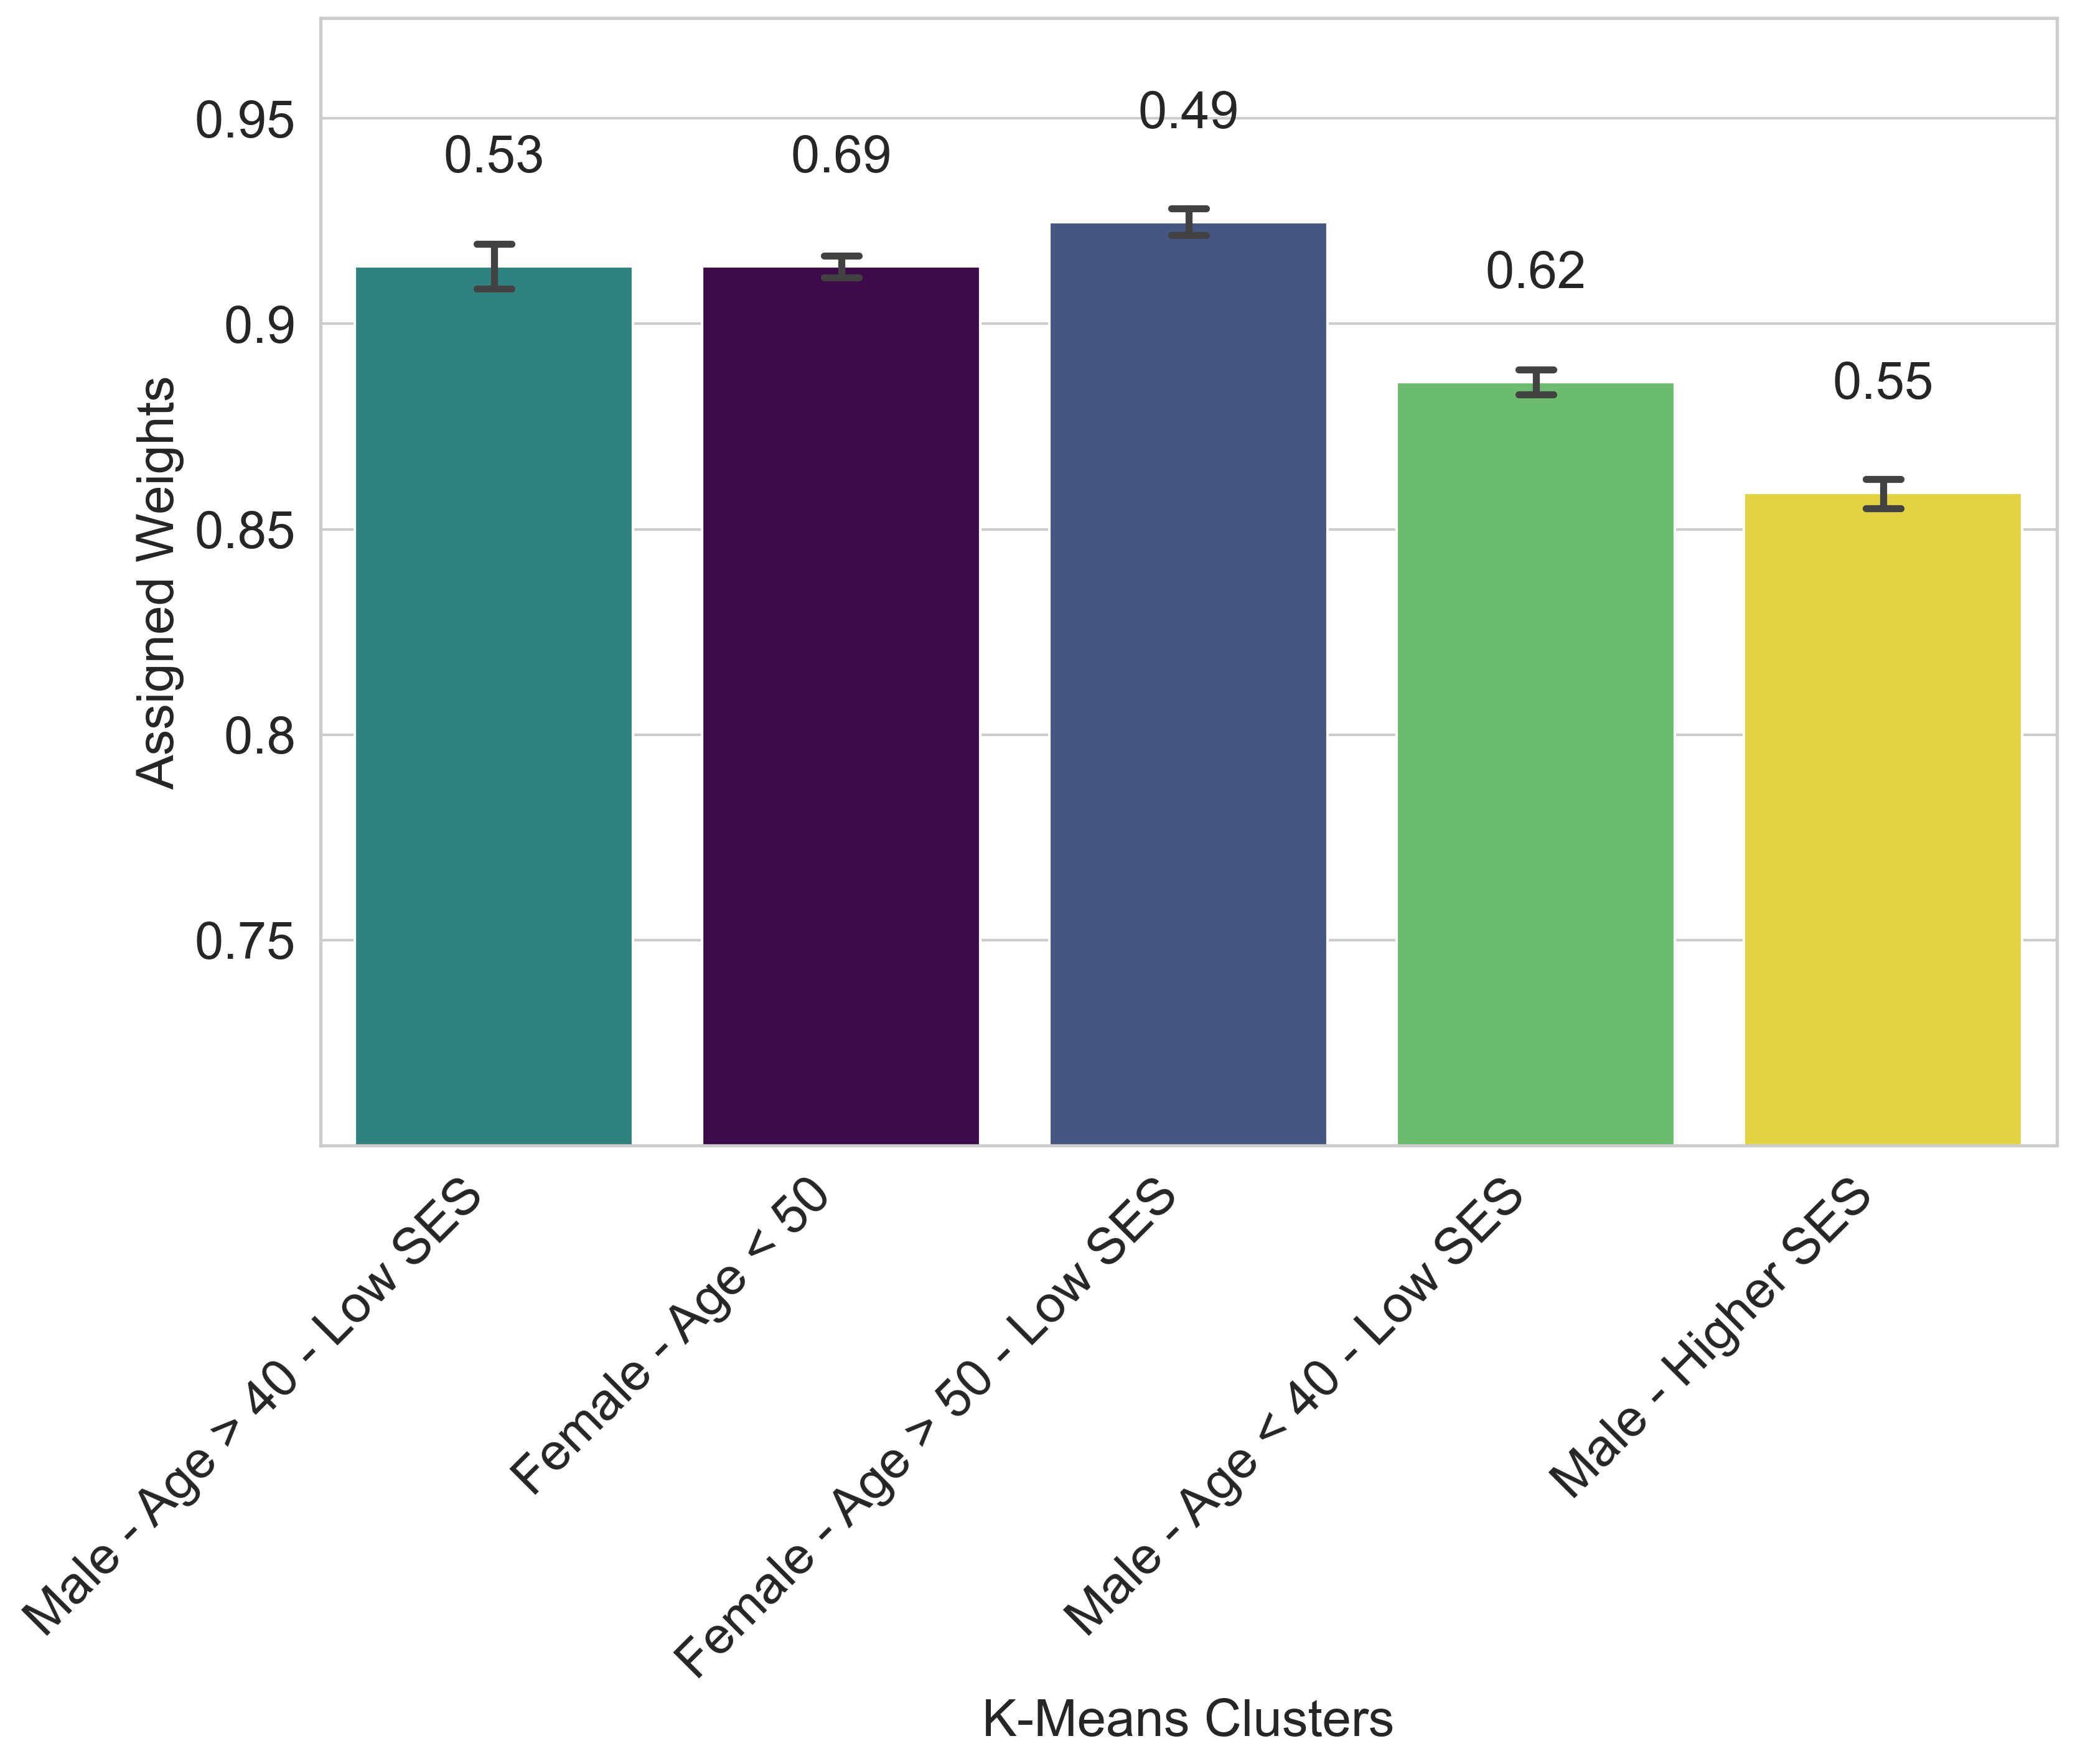

In [4]:
# K-means clustering boxplot!!!

df = pd.read_csv("./merged_data_lab_data_10_08.csv")

bin_labels_5 = [0, 1, 2, 3, 4]

df['binned'] = pd.qcut(df['weight_val'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels_5)

# Set the font scale and style
sns.set(font_scale=1.4, style="whitegrid")

# Calculate the balanced accuracy for each cluster
balanced_accuracy = df.groupby('Cluster').apply(lambda x: balanced_accuracy_score(x['Labels'], x['Prediction'])).reset_index()
balanced_accuracy.columns = ['Cluster', 'balanced_accuracy']

# Merge the balanced accuracy with the original DataFrame
df = pd.merge(df, balanced_accuracy, how='left', on='Cluster')

# Create the bar plot again with standard deviation bars
plt.figure(figsize=(12, 8), dpi=300)
# colors = sns.color_palette("viridis", 5)
# yellow --> #fde725
# light green --> #5ec962
# teal --> #21918c
# blue --> #3b528b
# dark blue --> #440154
colors = ['#21918c', '#440154', '#3b528b', '#5ec962', '#fde725']
ax = sns.barplot(x="Cluster", y="weight_val", data=df, palette=colors, order=[0,1,2,3,4], capsize=.1)

# Add the balanced accuracy as text at a fixed height above the bars
# We need to reorder the balanced_accuracy dataframe according to the new order
balanced_accuracy = balanced_accuracy.set_index('Cluster').loc[[0, 1, 2, 3, 4]].reset_index()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.023,
            '{:1.2f}'.format(balanced_accuracy['balanced_accuracy'][i]),
            ha="center", fontsize = 20)

# Set the title and labels
ax.set_xlabel('K-Means Clusters', fontsize=20)
ax.set_ylabel('Assigned Weights', fontsize=20)

# Set the lower limit of y-axis
ax.set_ylim(bottom=0.70)

# Rename the x-axis labels
new_labels = ["Male - Age > 40 - Low SES", "Female - Age < 50", "Female - Age > 50 - Low SES", "Male - Age < 40 - Low SES", "Male - Higher SES"] 
ax.set_xticklabels(new_labels, rotation=45, ha='right', fontsize=20)

# Set y-axis to have 5 ticks from 0.4 to max value
y_ticks = np.round(np.linspace(0.75, 0.95, 5), decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20)

# Saving the updated plot
modern_plot_path = './plots_lab_data/grouped_weight_bacc_kmeans_lab_data.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()


<Figure size 432x288 with 0 Axes>

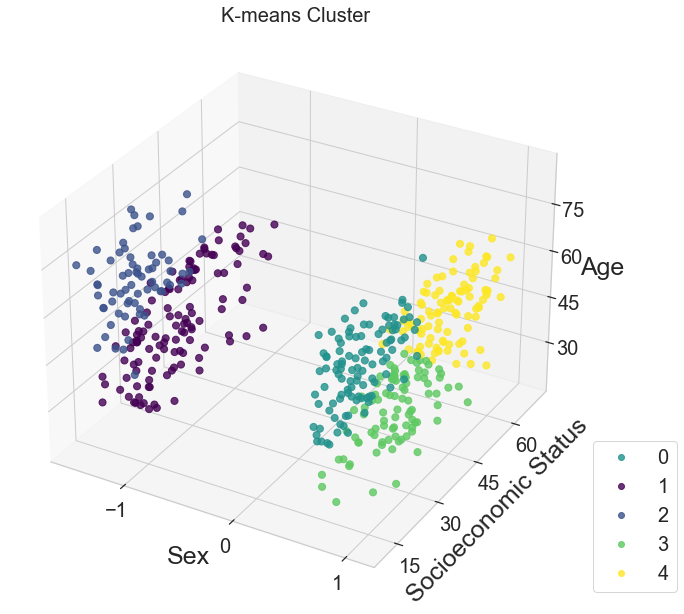

In [5]:
# axes instance
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

plt.clf()
sns.set_style("whitegrid")
# sns.set()
fig = plt.figure(figsize=(15,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

df = pd.read_csv("./merged_data_lab_data_10_08.csv")

# Add random Gaussian noise to the specific column
mean, std_dev = 0, 0.1 # Set your mean and standard deviation
df['demo_sex_x_bef'] = df['demo_sex_x'].copy()
np.random.seed = 42
df['demo_sex_x'] += np.random.normal(mean, std_dev, size=df['demo_sex_x'].shape)

bin_labels_5 = [0, 1, 2, 3, 4]

df['binned'] = pd.qcut(df['weight_val'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels_5)

# Match the learned weight clusters with the kmeans clusters for better color comparison
mapping = {4: 2, 2: 1, 3: 0, 1: 3, 0: 4}
df['binned_matched_clusters'] = df['binned'].map(mapping)

# To plot the scatterplot with the learned weight
# labels = df['binned_matched_clusters']

# To plot the scatterplot with the assigned cluster
labels = df['Cluster']

# yellow --> #fde725
# light green --> #5ec962
# teal --> #21918c
# blue --> #3b528b
# dark blue --> #440154

colors = ['#21918c', '#440154', '#3b528b', '#5ec962', '#fde725']

cmap = mcolors.ListedColormap(colors)

sc = ax.scatter(df['demo_sex_x'], df['demo_ses_y'], df['age_y'], s=50, c=labels, marker='o', cmap=cmap, alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)


ax.set_xlabel('Sex', fontsize=25, labelpad=10)
ax.set_ylabel('Socioeconomic Status', fontsize=25, labelpad=10)
ax.set_zlabel('Age', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Increase z-axis tick font size
for t in ax.zaxis.get_major_ticks():
    t.label.set_fontsize(20)
    
# Set the number of ticks for each axis
ax.xaxis.set_major_locator(mticker.MaxNLocator(3))
ax.yaxis.set_major_locator(mticker.MaxNLocator(5))
ax.zaxis.set_major_locator(mticker.MaxNLocator(7))

# Saving the updated plot
modern_plot_path = './plots_lab_data/scatterplot_kmeans_lab_data.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)

# legend
plt.show()

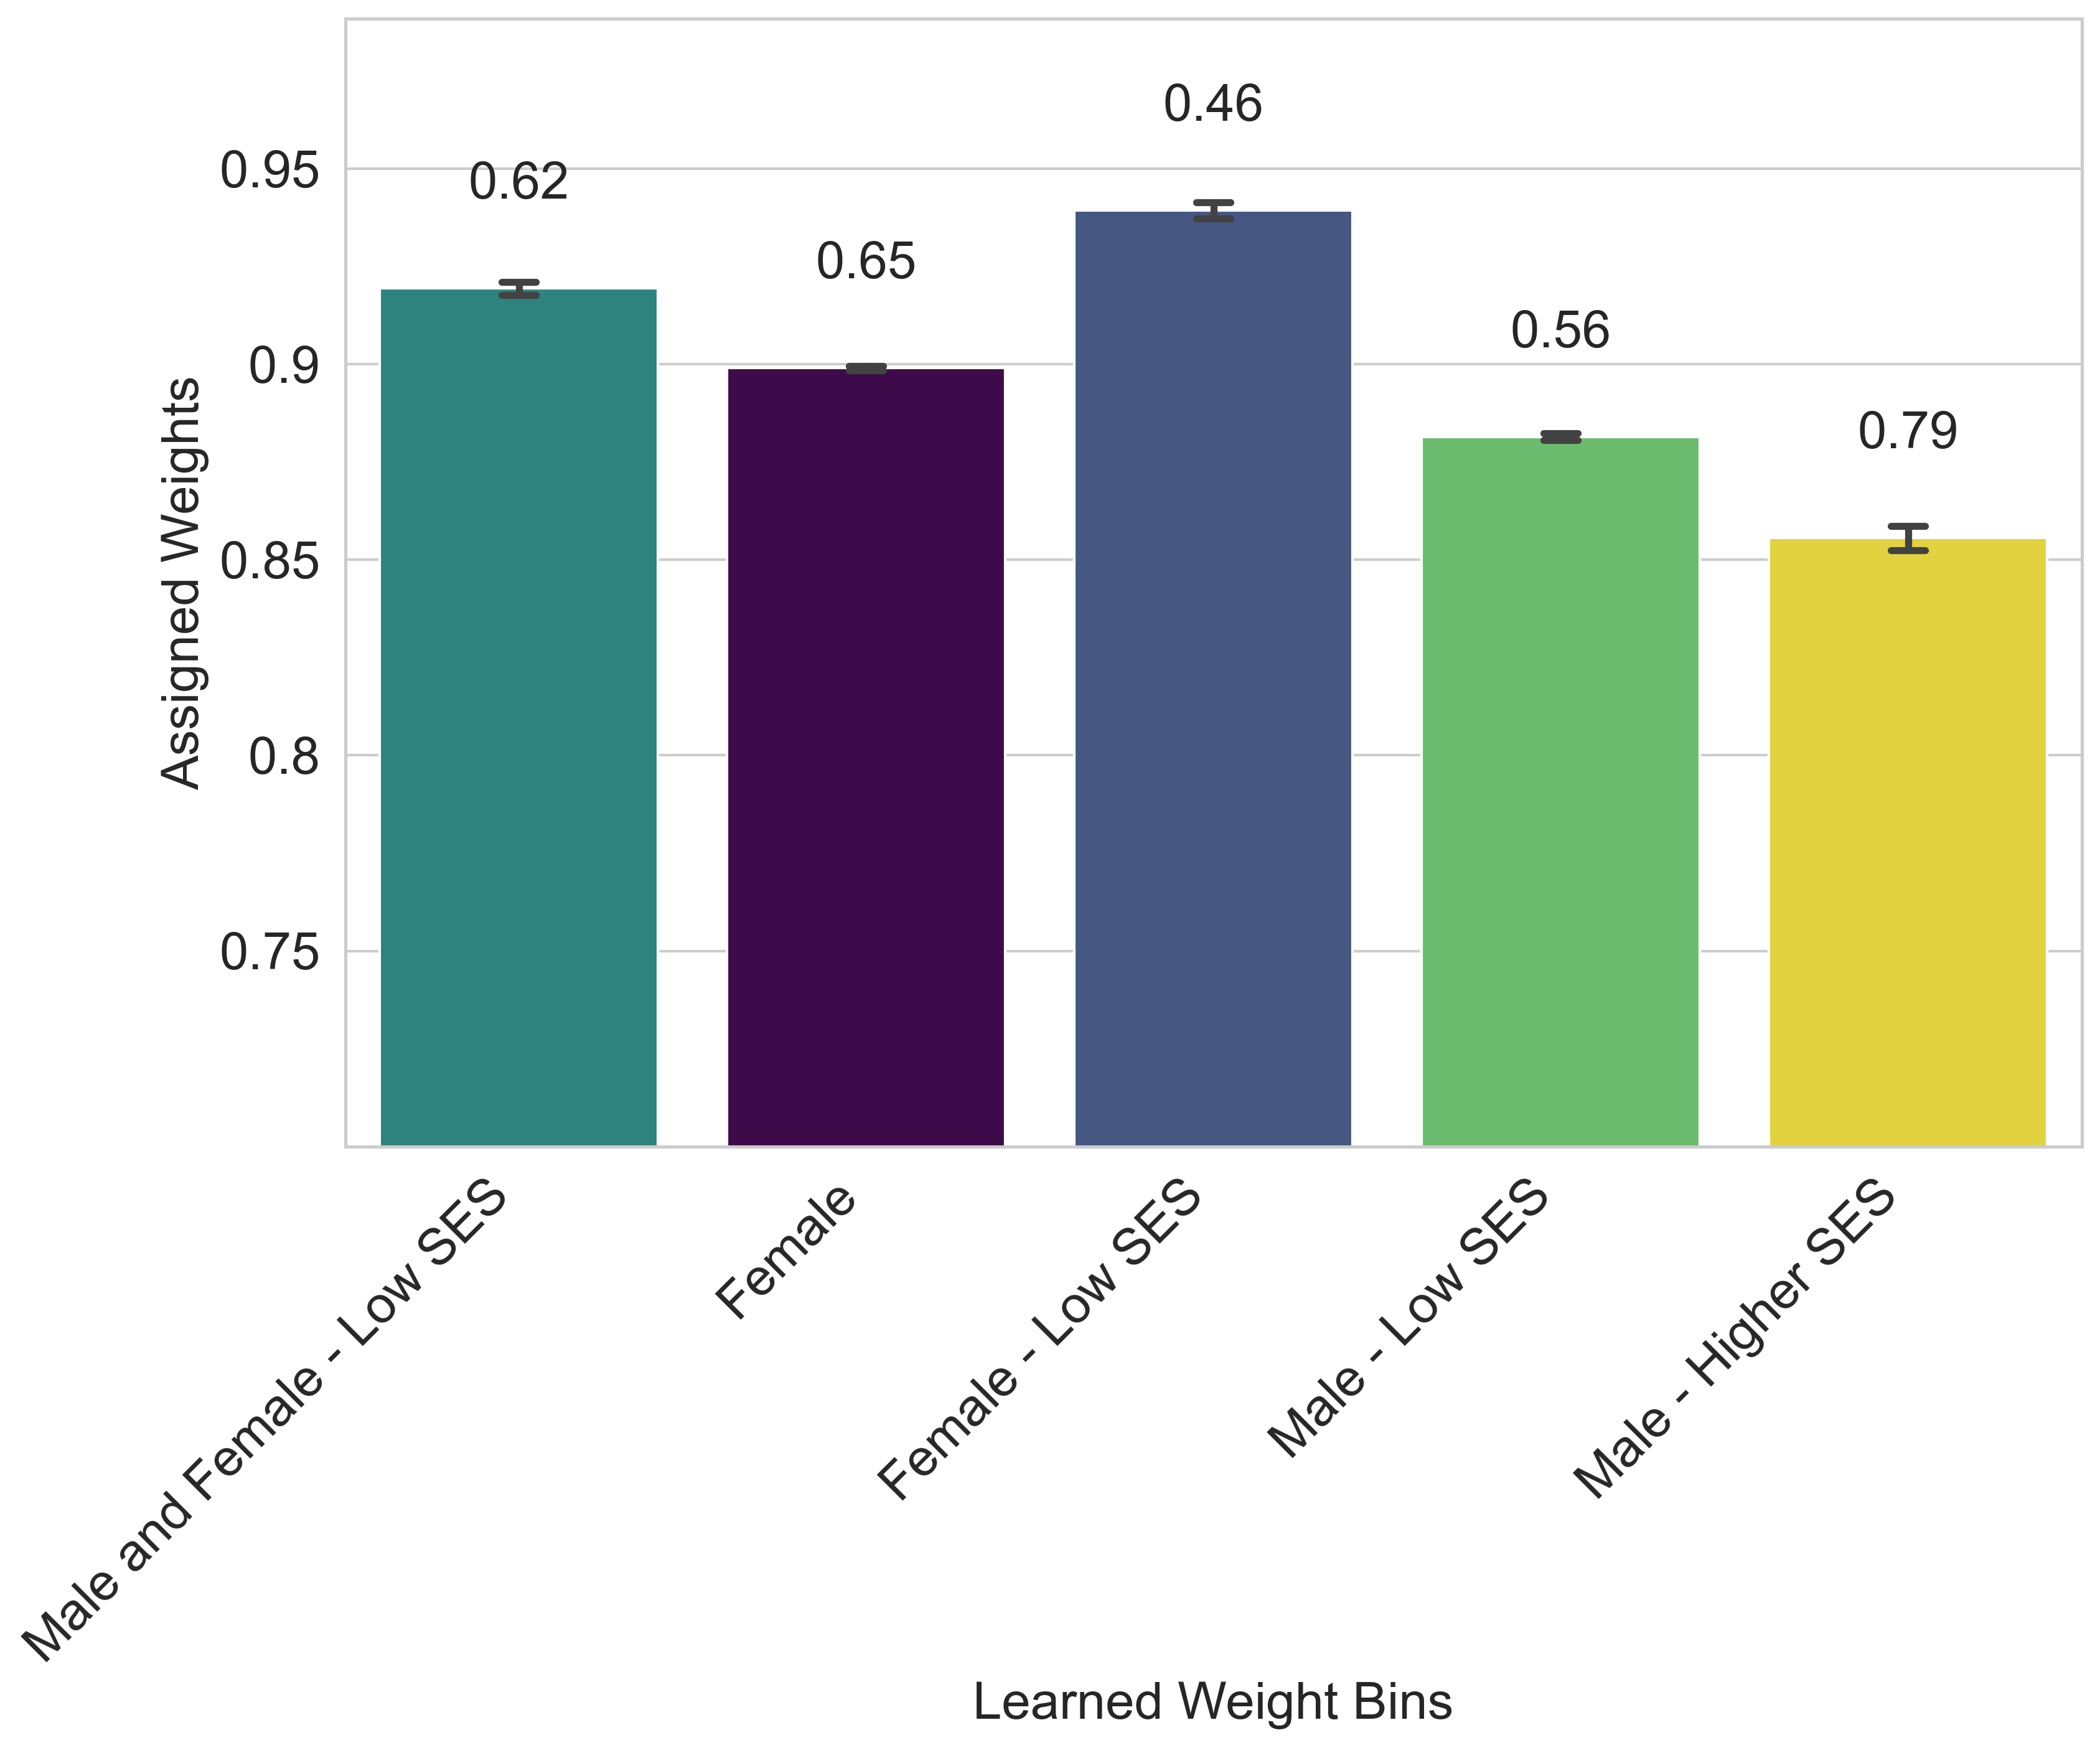

In [6]:
# Binned weights - BACC boxplot

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, accuracy_score

df = pd.read_csv("./merged_data_lab_data_10_08.csv")

bin_labels_5 = [0, 1, 2, 3, 4]

df['binned'] = pd.qcut(df['weight_val'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels_5)

# Match the learned weight clusters with the kmeans clusters for better color comparison
mapping = {4: 2, 2: 1, 3: 0, 1: 3, 0: 4}
df['binned_matched_clusters'] = df['binned'].map(mapping)

# Set the font scale and style
sns.set(font_scale=1.4, style="whitegrid")

# Calculate the balanced accuracy for each cluster
balanced_accuracy = df.groupby('binned_matched_clusters').apply(lambda x: balanced_accuracy_score(x['Labels'], x['Prediction'])).reset_index()
balanced_accuracy.columns = ['binned_matched_clusters', 'balanced_accuracy']

# Merge the balanced accuracy with the original DataFrame
df = pd.merge(df, balanced_accuracy, how='left', on='binned_matched_clusters')

# Create the bar plot again with standard deviation bars
plt.figure(figsize=(12, 8), dpi=300)
# colors = sns.color_palette("viridis", 5)
# yellow --> #fde725
# light green --> #5ec962
# teal --> #21918c
# blue --> #3b528b
# dark blue --> #440154
colors = ['#21918c', '#440154', '#3b528b', '#5ec962', '#fde725']
ax = sns.barplot(x="binned_matched_clusters", y="weight_val", data=df, palette=colors, order=[0,1,2,3,4], capsize=.1)

# Add the balanced accuracy as text at a fixed height above the bars
# We need to reorder the balanced_accuracy dataframe according to the new order
balanced_accuracy = balanced_accuracy.set_index('binned_matched_clusters').loc[[0,1,2,3,4]].reset_index()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.023,
            '{:1.2f}'.format(balanced_accuracy['balanced_accuracy'][i]),
            ha="center", fontsize = 20)

# Set the title and labels
ax.set_xlabel('Learned Weight Bins', fontsize=20)
ax.set_ylabel('Assigned Weights', fontsize=20)

# Set the lower limit of y-axis
ax.set_ylim(bottom=0.70)

# Rename the x-axis labels
new_labels = ["Male and Female - Low SES", "Female", "Female - Low SES", "Male - Low SES", "Male - Higher SES"] 
ax.set_xticklabels(new_labels, rotation=45, ha='right', fontsize=20)

# Set y-axis to have 5 ticks from 0.4 to max value
y_ticks = np.round(np.linspace(0.75, 0.95, 5), decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20)

# Saving the updated plot
modern_plot_path = './plots_lab_data/grouped_weight_bacc_binned_weights_lab_data.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()



In [ ]:
input_data = pd.read_csv("./merged_data_lab_data_10_08.csv")
c = input_data['weight_val']
plt.clf()
plt.xlim(0.8, 1.0) # edit accordingly
sns.set(font_scale=1.4, style="whitegrid")

sns.despine(left=False) #plum, navajowhite, skyblue https://matplotlib.org/stable/gallery/color/named_colors.html
ax = sns.histplot(data=c, bins=15, color='#fcca46')
plt.ylabel("Number of Subjects", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Sample Weight Distribution", fontsize=25)

# Saving the updated plot
modern_plot_path = './plots_lab_data/histogram_weights_lab_data.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

input_data_feats = pd.read_csv("./source_data/lab_data/combined_training_data_with_trauma_vars_longitudinal_07_26.csv")
input_data_feats = input_data_feats.drop_duplicates(subset='subject', keep='last')

input_data_feats = input_data_feats[['subject', 'trauma']]
input_data = pd.read_csv("./merged_data_lab_data_10_08.csv")

merged = pd.merge(input_data, input_data_feats, on='subject')

merged = merged[merged['trauma'] > -1]

t_stat, p_value = ttest_ind(merged[merged['trauma'] == 0]['weight_val'], 
                                merged[merged['trauma'] == 1]['weight_val'], alternative='two-sided')

print(p_value)

# Calculate the balanced accuracy for each cluster
balanced_accuracy = merged.groupby('trauma').apply(lambda x: balanced_accuracy_score(x['Labels'], x['Prediction'])).reset_index()
balanced_accuracy.columns = ['trauma', 'balanced_accuracy']
control_trauma = len(merged[merged['trauma']==0])
positive_trauma = len(merged[merged['trauma']==1])
print(balanced_accuracy)
print(f'Control trauma: {control_trauma}')
print(f'Positive trauma: {positive_trauma}')

# Create a boxplot with notches
plt.figure(figsize=(15, 10), dpi=300)
box_plot = sns.boxplot(x="trauma", y="weight_val", data=merged, palette=['#5ec962', '#fcca46'], notch=True)

p_label = 'p<0.001' if p_value < 0.001 else f'p={p_value:.2f}'
plt.text(0.5,merged['weight_val'].min(), p_label, horizontalalignment='center', size='xx-large', color='black', weight='semibold',
        position=(0.49, 0.81))

bacc_label_0 = balanced_accuracy[balanced_accuracy['trauma']==0]*100
bacc_label_0 = bacc_label_0['balanced_accuracy']
bacc_label_0 = f'BACC: {bacc_label_0.item():.2f}%'
plt.text(0,merged['weight_val'].min(), bacc_label_0, horizontalalignment='center', size='xx-large', color='black', weight='semibold',
        position=(0.01, 0.81))

bacc_label_1 = balanced_accuracy[balanced_accuracy['trauma']==1]*100
bacc_label_1 = bacc_label_1['balanced_accuracy']
bacc_label_1 = f'BACC: {bacc_label_1.item():.2f}%'
plt.text(1,merged['weight_val'].min(), bacc_label_1, horizontalalignment='center', size='xx-large', color='black', weight='semibold',
        position=(0.99, 0.81))


# Set the title and labels
plt.title(f'Weight Value and Childhood Trauma - N: Controls/Trauma = {control_trauma}/{positive_trauma}', fontsize=30)
plt.xlabel('', fontsize=30)
plt.ylabel('Weight Value', fontsize=30)

# Move the legend to an empty space
# plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

new_labels = ["Control", "Childhoom Trauma"] 
box_plot.set_xticklabels(new_labels, fontsize=30)
box_plot.set_ylim(0.80,0.975)
plt.yticks(fontsize=20)
# Display the plot
plt.tight_layout()

# Saving the updated plot
modern_plot_path = './plots_lab_data/boxplot_weights_trauma_bacc_lab_data.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()
